In [1]:
# Load packages
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [2]:
df = pd.read_csv('prix_maisons.csv')
display(df.head())

,taille,n_chambres,n_salle_de_bain,prix
0,84,1,1,43.747
1,45,4,1,30.100
2,73,1,3,39.481
3,34,2,3,23.908
4,31,4,3,24.144


In [3]:
# Split the data into X and y
# You can adapt the input and output columns to fit your own data
input_cols = ['taille', 'n_chambres', 'n_salle_de_bain']
output_col = ['prix']
X = df[input_cols]
y = df[output_col]

# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

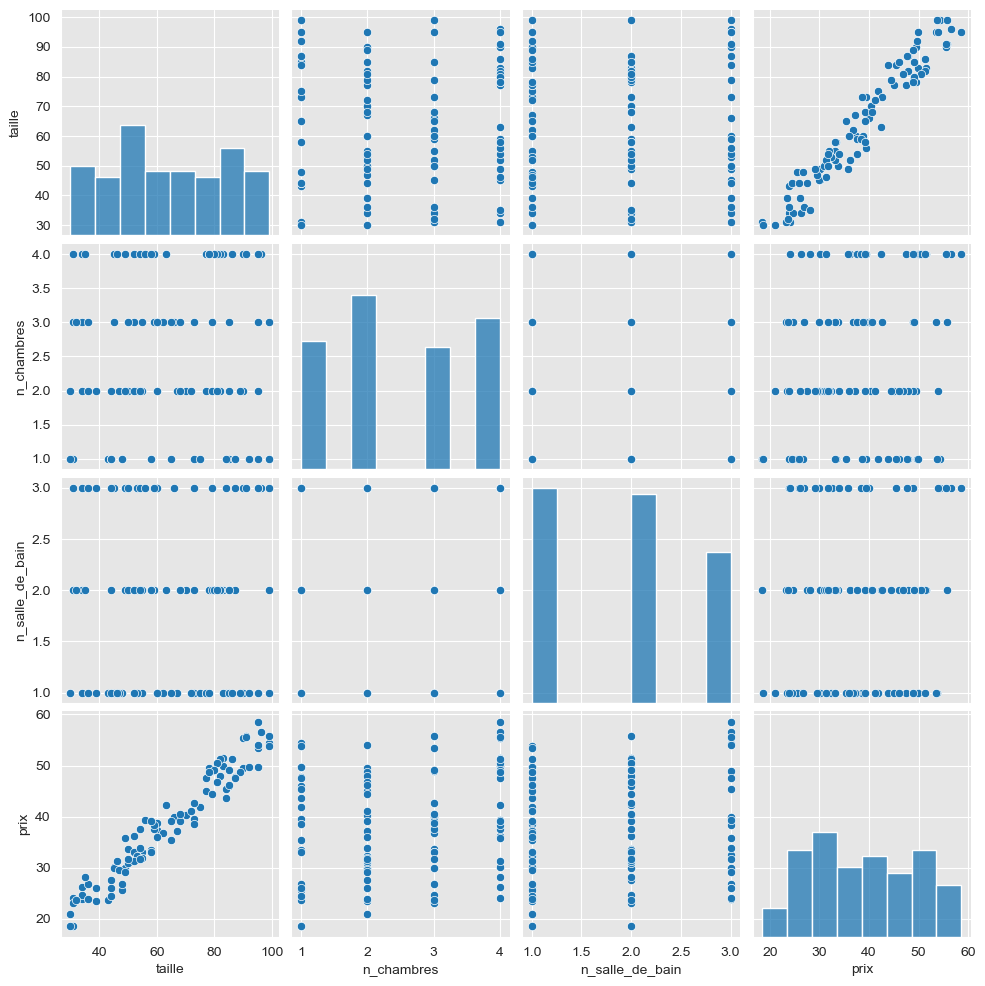

In [33]:
fig1=sns.pairplot(
    df,
    x_vars=input_cols + output_col,
    y_vars=input_cols + output_col
)

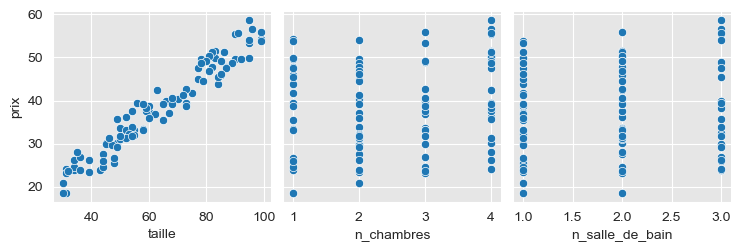

In [4]:
fig1=sns.pairplot(
    df,
    x_vars=input_cols,
    y_vars=output_col
)

In [8]:
# Set up and fit the linear regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Flatten the prediction and expected lists
predicted = lin_reg.predict(X_test).reshape(-1)
expected = y_test.values.reshape(-1)


In [16]:
%matplotlib inline
# Import plotting package
import plotly.express as px

def plot_results(expected, predicted):
    # Put data to plot in dataframe
    df_plot = pd.DataFrame({'expected':expected, 'predicted':predicted})

    # Make scatter plot from data
    fig = px.scatter(
        df_plot, 
        x='expected', 
        y='predicted',
        title='Predicted vs. Actual Values')

    # Add straight line indicating perfect model
    fig.add_shape(type="line",
        x0=min(expected), y0=min(expected), x1=max(expected), y1=max(expected),
        line=dict(
            color="Red",
            width=4,
            dash="dot",
        )
    )

    # Show figure
    fig.show()

In [17]:
plot_results(expected, predicted)

In [11]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(expected, predicted)
print(f"R2: {round(r2,4)}") 

RMS: 0.8160 
R2: 0.9948


# With scaling in pipeline

In [12]:
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline  

In [14]:
steps = [('scaler', StandardScaler()), ('reg', LinearRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)
pipeline.fit(X_train, y_train)
# Flatten the prediction and expected lists
predicted = pipeline.predict(X_test).reshape(-1)
expected = y_test.values.reshape(-1)

In [2]:
pipeline_coefs = pipeline.steps[1][1].coef_[0]

plt.bar(input_cols, pipeline_coefs)
plt.xticks(rotation=45)
plt.show()

NameError: name 'pipeline' is not defined

In [3]:
plot_results(expected, predicted)

NameError: name 'plot_results' is not defined

In [5]:
import numpy as np 

error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(expected, predicted)
print(f"R2: {round(r2,4)}") 

NameError: name 'predicted' is not defined

# feature selection

[8.97511538 1.89158206 0.16589124]


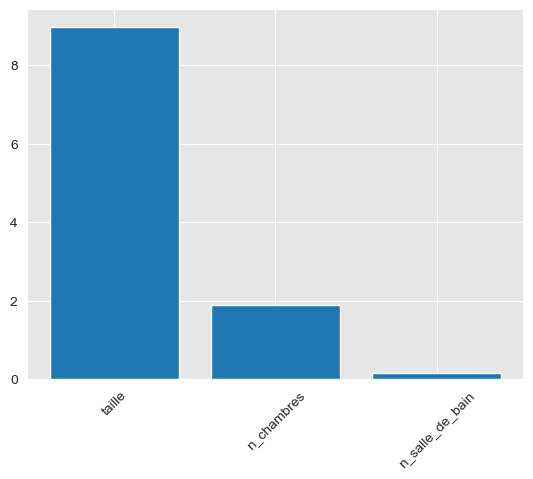

In [52]:
# Import Lasso
from sklearn.linear_model import Lasso


lasso_steps = [('scaler', StandardScaler()), ('lasso_reg', Lasso(alpha=0.5))]

lasso_pipeline = Pipeline(lasso_steps)
# Fit the model to the data
lasso_pipeline.fit(X_train, y_train)


lasso_coef = lasso_pipeline.named_steps['lasso_reg'].coef_
print(lasso_coef)
plt.bar(input_cols, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [53]:
# Flatten the prediction and expected lists
predicted = lasso_pipeline.predict(X_test).reshape(-1)
expected = y_test.values.reshape(-1)
plot_results(expected, predicted)